# [Learn the Basics](https://pytorch.org/tutorials/beginner/basics/intro.html)

An introduction to PyTorch taken from the pytorch beginner tutorials.

Using the FashionMNIST dataset to train a classification NN.

## Tensors
Tensors are specil data structures similar to arrays and matrices (they're basically N-dimensional matrices). Pytorch uses these to encode input/outputs and model params.

In [1]:
import torch
import numpy as np


### Initialising a Tensor

In [2]:
# Directly from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)


In [3]:
# From numpy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)


In [4]:
# From another tensor
x_ones = torch.ones_like(x_data)  # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

# overrides the datatype of x_data
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")


Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1204, 0.5206],
        [0.2104, 0.0039]]) 



In [5]:
# With random or constant values
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")


Random Tensor: 
 tensor([[0.8940, 0.3847, 0.0450],
        [0.0967, 0.9241, 0.6508]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Atrributes of a Tensor
These describe the tensor's shape, dtype and device

In [6]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")


Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operations on Tensors
All tensor ops can be run on the GPU. By default tensors are created on the CPU and must be explicitly moved to the GPU using the `.to` method. This can be time/memory intensive.

In [7]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')


In [8]:
# Standard NP indexing/slicing
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:, 1] = 0
print(tensor)


First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [9]:
# Joining tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(t2)


tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [10]:
# Arithmetic Operations
# This computes the matrix multiplication between two tensors.
# y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product.
# z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [11]:
# Single element tensors
# using .item() converts a single element tensor to a python number
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))


12.0 <class 'float'>


In [12]:
# In-place opes store result in place and are denoted by a `_` suffix
# They sevae some memory but can cause issues with derivatives, their use is discouraged.
print(tensor, "\n")
tensor.add_(5)
print(tensor)


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their memory location, changing one will change the other.

In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")


t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


## Datasets and Dataloaders
Code for processing data samples can get messy and hard to maintain (even with these tools). However we want to decouple training code from datasets handling.

Dataloaders and Datasets allow us to use preloaded datasets and our own data. *Dataset* stores the samples and their labels, *Dataloader* wraps an iterable around the *dataset* to enable easy access to samples.

Pytorch provides a number of datasets that are preloaded and can be used to prototype and benchmark models.

### Loading a dataset
We will work with the [Fashin-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) dataset from TorchVision.
- num_train_samples = 60k
- num_test_samples = 10k
- num_classes = 10
- image_shape = (1,28,28) i.e. 28x28 grayscale

We use the following parameters to load the dataset:
- `root` is the path to the data
- `train` specifics the train/test set
- `download=true` downloads the data if not available at root
- `transform` and `target_transform` specify the feature and label transformations



In [14]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


### Iterating and Visualising the Dataset
Datasets can be indexed manually like a list: `training_data[index]` and visualised using `matplotlib`.

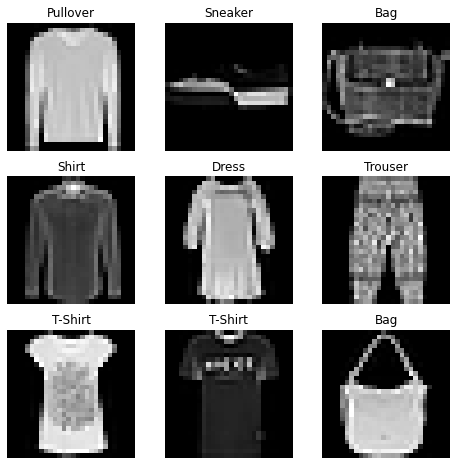

In [15]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")


### Creating a custom dataset for your files
A custom Dataset class must implement the ```__init__, __len__ and __getitem__``` methods.

#### \_\_init\_\_
Runs on instantiation. We assume that the labels are stored in a csv separate to the images.

#### \_\_len\_\_ 
Returns the number of samples in the dataset.

#### \_\_getitem\_\_
Loads and returns a sample from the dataset at thek given index ```idx```. Based on the index it converts an image to a tensor (from disk) and gets the label from the csv data.

In [16]:
import os
import pandas as pd
from torchvision.io import read_image


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        """Loads the csv into memory but not the images

        Args:
            annotations_file ([type]): [description]
            img_dir ([type]): [description]
            transform ([type], optional): [description]. Defaults to None.
            target_transform ([type], optional): [description]. Defaults to None.
        """
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        """Loads and returns a sample from the dataset at thek given index ```idx```. 
        Based on the index it converts an image to a tensor (from disk) and gets the label from the csv data.

        Args:
            idx (int): image idx

        Returns:
            (image,label,): [description]
        """
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


### Preparing your data for training with Dataloaders
The `Dataset` retrieves our datasets features and labels one sample at a time.
We typically want to use minibatches and reshuffle data at every epoch (maybe) to reduce overfitting. We can also use `multiprocessing` to speed up data retrieval.

`Dataloader` is an iterable that abstracts all this away.

In [20]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


### Iterate through the DataLoader
Once the dataset is loaded in the dataloader we can iterate over it as needed.
Each iterations returns a batch of `train_features` and `train_labels` (of batch size=64 each). The data is shuffled after each epoch (all the batches of data have been seen).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


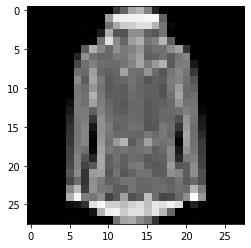

Label: Coat(4)


In [27]:
# Display the image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}({label})")


## Transforms
Data sometimes needs to be **transformed**, manipulated to make it suitable for training.

All TorchVision datasets have 2 paramters, `transform` to modify features and `target_transform` to modify labels, that accept callables. Several examples are available in  `torchvision.transforms`.

FashionMNIST features are in PIL image format, labels are integers. Fro training we need the features as normalized tensors and the labels as one-hot encoded tensors. To make these transformations we us `ToTensor` and `Lambda`.

### ToTensor()
Converts a PIL image/NumPy array to `FloatTensor` and scales the pixel intensities to [0,1]

### Lambda Transforms
Applies a user defined lambda. We will define a function the takes an int and converts it to a one hot encoded tensor.

In [31]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(
        10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)


## Build the Neural Network
NNs comprise layers/modules that operate on the data. Everything needed is in **torch.nn**. Every module in PyTorch subclasses **nn.Module**. A NN is a module that consists of other modules (layers). This allows for building and managing complex architectures.

In [35]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [14]:
# Check for CUDA device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')


Using cuda device


### Define the class
Subclass `nn.Module`, and initialise the NN layers in `__init__`. Every `nn.Module`  subclass implements the operations on the input data in the `forward` method.

In [48]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [49]:
model = NeuralNetwork().to(device)
print(model)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [51]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")


Predicted class: tensor([3], device='cuda:0')


### Model Layers
Lets see what happens to a sample minibatch of 3 28x28 images as it passes through the network.

In [57]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())


torch.Size([3, 28, 28])


#### nn.Flatten 
We initialize the flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values.

In [58]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())


torch.Size([3, 784])


#### nn.Linear
The linear layer applieas a linear transform on the input

In [59]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())


torch.Size([3, 20])


#### nn.ReLU
Non-linear activations create the complex mappings between the model input and output.

In [60]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")


Before ReLU: tensor([[ 0.1253, -0.3219,  0.3639,  0.0467, -0.1325, -0.1110, -0.5925,  0.5686,
         -0.5764,  0.0035, -0.2198, -0.7203, -0.6499, -0.0496, -0.5509,  0.1742,
          0.3919, -0.2112,  0.4511, -0.3401],
        [ 0.0866, -0.4604,  0.4971, -0.2294,  0.1781, -0.0484, -0.7706,  0.7902,
         -0.2367, -0.1641, -0.6644, -0.5860, -0.5936, -0.1562, -0.6433, -0.0020,
          0.3931,  0.1530,  0.2274,  0.0027],
        [-0.0481, -0.3700,  0.3255, -0.0960,  0.1798, -0.0046, -0.7114,  0.4499,
         -0.3260, -0.0264, -0.5448, -0.7023, -0.3717,  0.0079, -0.3609,  0.4968,
          0.2307,  0.1809, -0.0315, -0.1671]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1253, 0.0000, 0.3639, 0.0467, 0.0000, 0.0000, 0.0000, 0.5686, 0.0000,
         0.0035, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1742, 0.3919, 0.0000,
         0.4511, 0.0000],
        [0.0866, 0.0000, 0.4971, 0.0000, 0.1781, 0.0000, 0.0000, 0.7902, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

#### nn.Sequential
This is an ordered container of modules that passes data through automatically.

In [61]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)


#### nn.Softmax
The last linear layer returns the logits which are passed through Softmax to rescale the logits to [0,1]. We interpret this as probabilities (not really onfidences though).

In [62]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)


### Model parameters
Many layers inside the network are *parametrized*, i.e. have weights and biases to be optimized. Subclassing `nn.Module` automatically tracks all the fields defined and makes the parameters accessible using `parameters()` or `named_parameters()`.

In [63]:
# Iterate over each parameter and print its size and a preview of the values
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")


Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0296,  0.0350, -0.0141,  ...,  0.0035,  0.0116, -0.0268],
        [ 0.0356,  0.0252,  0.0141,  ..., -0.0260,  0.0170,  0.0119]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0015, -0.0204], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0095,  0.0147, -0.0163,  ...,  0.0387,  0.0070, -0.0214],
        [ 0.0304,  0.0146, -0.0108,  ..., -0.0253,  0.0180,  0.0066]],
       device='cuda:0', grad_fn=<

## Automatic differentiation with `torch.autograd`
The most common training algoirthm is **back propagation**. This adjust model weights accoridng to the **gradient** of the loss function withr espect to the given parameter/weight.

Consider the simplest one layer network with input `x` and parameters `w` nd `b` and a loss function:

In [2]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)


### Tensors, Functions and the Computational Graph
The code defines the following **computational graph**:
![Computational Graph](https://pytorch.org/tutorials/_images/comp-graph.png)

In this network, `w` and `b` are the **parameters** to be optimized. We need to compute the *gradients* of the loss function w.r.t. those varaibles (`requires_atuograd=True`)

A function that we apply to tensors to construct the computational graph is in fact an object of class `Function` that can compute the function in the *forward* direction and it's derivating during the 1backward propagation` step.

In [3]:
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)


Gradient function for z = <AddBackward0 object at 0x7ff17a5231f0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7ff178bfd6a0>


### Computing Gradients
To optimize the wieghts in the entwork we compute the derivatives of the loss function w.r.t the parameters by calling `loss.backward()`, and then retrieve the values from `w.grad` and `b.grad` (not done manually by us).

### Disabling Gradient Tracking
We can turn off gradient tracking to improve efficiency during inference (only forward pass needed), or to **freeze parameters** for [finetuning](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html). We still register all the parameters/weights with the optimizer as normal however.

We can do this by surrounding the code in a `with torch.no_grad()` block or by calling `detach()` on the tensor.

### More on Computational Graphs
Because the DAG for the computational graph is created from scratch after each `.backward()` call, this allows us to use control flow statements in the model and change the shape, size and operations at each iteration if needed.

## Optimizing Model Parameters
Now that we have a model and data its time to train, validate and test our model by optimizing its parameters on our data. 

In each iteration/epoch the model makes a prediction, calculates the error/loss, collects the derivatives and **optimizes** these using gradient descent. See [backpropoagation by 3B1B](https://www.youtube.com/watch?v=tIeHLnjs5U8)

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


class NeuralNetwork(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork()


### Hyperparameters
Hparams are adjustable values that lat us control the optimization process ([read more](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)).

We define the following hparams:
- **Number of epochs** - how many times to iterate of the dataset
- **Batch size** - number of data samples propagated before parameters are updates
- **Learning rate** - smaller values train slower but have more predictable behaviour during training.

In [3]:
learning_rate = 1e-3
batch_size = 64
epochs = 5


### Optimization Loop
Once we set the Hparams we must trian and optimize the model (looping over epochs).
Each epoch has a **training loop** and a **validation/testing loop**.

#### Loss Function
Measures the how incorrect the netowrk result is compared to the target value, we want to **minimize** this.

Common loss functions are `nn.MSELoss` (Mean Square Error) for regression, and `nn.NLLLoss`(Negative Log Likelihood) for classification. `nn.CrossEntropyLoss` combines `nn.LogSoftmax` and `nn.NLLLoss`.

We pass our models logits.output to `nn.CrossEntropyLoss`, which normalizes the logits and computes the error.

In [4]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()


#### Optimizer
We will use Stochastic Gradient Descent. the `optimizer` object encapsulated the optimization logic.

Inside the trianing loop optimization happens in 3 steps:
1. Call `optimizer.zero_grad()` to reset the gradients of the model parameters. Gradients add up by default (useful for if we want a bigger minibatch but can't do it in one go because of memory constraints).
2. Backpropagate the loss by calling `loss.backword()`.
3. Call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.

In [5]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [7]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    """Loops over our optimization code"""
    # The actual size of the dataset, len(dataloader) gives the number of batches returned
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred.cpu(), y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn, device):
    """Evaluates the model's performance against the test data"""
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device))
            pred = pred.cpu()
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(
        f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [8]:
# Initialise the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = model.to(device)

epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1} \n-------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)

print("Done!")

Epoch 1 
-------------------
loss: 2.311255  [    0/60000]
loss: 2.292602  [ 6400/60000]
loss: 2.275878  [12800/60000]
loss: 2.264900  [19200/60000]
loss: 2.252029  [25600/60000]
loss: 2.234711  [32000/60000]
loss: 2.240597  [38400/60000]
loss: 2.210972  [44800/60000]
loss: 2.202068  [51200/60000]
loss: 2.176918  [57600/60000]
Test Error: 
 Accuracy: 36.1%, Avg loss: 2.167159 

Done!


## Saving and Loading the Model
PyTorch models store the learned parameters in an internal `state_dict` which can be persisted using `torch.save()`.

To load model weights you need an instance of the model first and then use `load_state_dict()`.

In [2]:
import torch
import torchvision.models as models

model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

model = models.vgg16() # We don't specify pretrained=True, i.e. don't load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval() # Important to do this before inference as it sets the dropout and abtchnorm layers to eval mode.

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Saving and Loading Models with Shapes
When loading model weights, we needed to first instantiate the model class because it defines the structure of a network. **DO NOT DO THIS** can save the structure together with the model by passing `model` instead of `model.state_dict()` to the save function. However, this requires the class definition (the actual python file) to be in the same location relative to everything else. It's a bad idea